In [27]:
import sys
import numpy as np
import pandas as pd
color_mine = ["#F8414A", "#5676A1"]
#读取positive的empath属性
filepath='G:\\sufe\\mental illness\\Dataset\\labeled\\positive\\data\\feature_empath\\'
file1=filepath+"users_content_1.csv"
df1 = pd.read_csv(file1)
df_column = df1.columns.values.tolist()
for i in range(2,11):
    file = filepath + 'users_content_{0}.csv'.format(i)
    df=pd.read_csv(file)
    df.columns =df_column
    frame=[df1,df]
    df = pd.concat(frame)
    df1=df
#读取infect users
infect_df = pd.read_csv('G:\\sufe\\mental illness\\Dataset\\labeled\\positive\\data\\infect_user_data.csv')
infect_id = infect_df['id']
df1 = df1[df1['uid'].isin(infect_id)]
#将empath汇总
file_res = filepath+'pos_empath.csv'
df1.to_csv(file_res,index=None)
#读取negative的empath属性
filepath_n='G:\\sufe\\mental illness\\Dataset\\labeled\\negative\\data\\feature_empath\\'
file1_n=filepath_n+"users_content_0.csv"
df1_n = pd.read_csv(file1_n)
df_column_n = df1_n.columns.values.tolist()
df_column_n[0]='uid'
df1_n.columns = df_column_n
for i in range(1,54):
    file_n = filepath_n + 'users_content_{0}.csv'.format(i)
    df_n=pd.read_csv(file_n)
    df_n.columns =df_column_n
    frame_n=[df1_n,df_n]
    df_n = pd.concat(frame_n)
    df1_n=df_n
#将empath汇总
file_res = filepath_n+'neg_empath.csv'
df1_n.to_csv(file_res,index=None)  

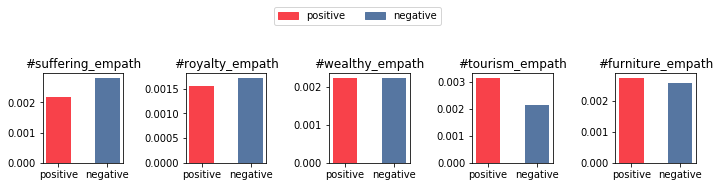

In [28]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
N=5
labels = ['positive','negative']
patches = [mpatches.Patch(color=color_mine[i], label="{:s}".format(labels[i]) ) for i in range(len(color_mine))]
fig,ax=plt.subplots(1,N,figsize=(10,2))
attributes_all = df_column[31:36]

x_value = [[0,1]] *N
y_value = [[np.mean(df1[attributes_all[i]]),np.mean(df1_n[attributes_all[i]])] for i in range(N)]
#y_value_median = [[np.median(p_df[attributes_all[i]]),np.median(n_df[attributes_all[i]])] for i in range(N)]
for x,y,sax,item in zip(x_value,y_value,ax,attributes_all):
    sax.bar(x,y,0.5,color=color_mine)
    sax.set_xticks(np.arange(2))
    sax.set_xticklabels(labels)
    sax.set_title('#'+ item)
ax[0].legend(handles=patches, bbox_to_anchor=(5,1.8), ncol=2)
plt.tight_layout() 
plt.show()